In [1]:
import numpy as np
import pandas as pd

In [2]:
books = pd.read_csv("books.csv")
users = pd.read_csv("users.csv")
ratings = pd.read_csv("ratings.csv")

G:\Anaconda3\envs\py3-TF2.0\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [5]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [6]:
print("Books:", books.shape)
print("Users:", users.shape)
print("Ratings:", ratings.shape)


Books: (271360, 8)
Users: (278858, 3)
Ratings: (1149780, 3)


In [22]:
# Let's check the null values
print("Books:","\n",books.isnull().sum())
print("\n")
print("Users:","\n",users.isnull().sum())
print("\n")
print("Ratings:","\n",ratings.isnull().sum())


Books: 
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


Users: 
 User-ID          0
Location         0
Age         110762
dtype: int64


Ratings: 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [12]:
# Let's check duplicate rows
print("Books: ", books.duplicated().sum())
print("Users: ", users.duplicated().sum())
print("Ratings: ", ratings.duplicated().sum())


Books:  0
Users:  0
Ratings:  0


# EDA

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
age_counts = pd.DataFrame(users["Age"].value_counts())
age_counts.reset_index(level=0, inplace =True)
age_counts

,index,Age
0,24.0,5687
1,25.0,5618
2,26.0,5547
3,23.0,5456
4,27.0,5383
...,...,...
160,168.0,1
161,132.0,1
162,159.0,1
163,186.0,1


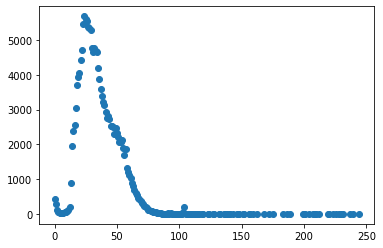

In [46]:
# Let's check the outliers in the Age
plt.scatter(age_counts['index'], age_counts["Age"])
plt.show()

We can see that most of the ratings are involved for the age category in 20-60. Whereas Age above 200 can be exception and cann't be consider as an outliers.

In [56]:
# Let's see if there is any this unusual in ratings columns.

ratings_counts = pd.DataFrame(ratings["Book-Rating"].value_counts().reset_index())
ratings_counts = ratings_counts.rename(columns = {"index": "Ratings", "Book-Rating": "Frequency"})
ratings_counts

,Ratings,Frequency
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


<BarContainer object of 11 artists>

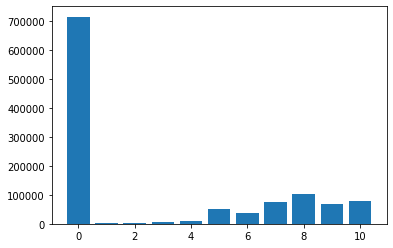

In [59]:
# ratings_counts.plot.hist(x= "Ratings", y= "Frequency")
plt.bar(ratings_counts["Ratings"], ratings_counts["Frequency"])

If you see most of the ratings are given 0 there might be many reasons why the ratings are given 0 so it's better to leave it, as if we drop these rows then many of the data may get lost.

In [64]:
# display(books, ratings, pd.merge(books, ratings, on="ISBN"))

In [65]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [92]:
books_ratings_merged = pd.merge(books, ratings, on="ISBN")
books_ratings_merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [93]:
# books_ratings_merged = books_ratings_merged.loc[:,['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','User-ID','Book-Rating']]
books_ratings_merged.shape

(1031136, 10)

In [94]:
print(books.shape)
print(ratings.shape)
print(books_ratings_merged.shape[0])

print(books.shape[0] +ratings.shape[0])

(271360, 8)
(1149780, 3)
1031136
1421140


Why books_ratings_merged has less no. of rows?

Because there are few books in ratings dataframe which is not present in BOOKS dataframe. Hence, it automatically get's excluded.

In [95]:
duplicate_rows = books_ratings_merged[books_ratings_merged.duplicated()]
duplicate_rows

# Hence we see there are no duplicate rows.

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating


Let's Build the Recommmender system now.

# Popularity Based Recommender System

In [97]:
ratings_with_name = books_ratings_merged.copy()
ratings_with_name.shape

(1031136, 10)

In [169]:
ratings_with_name

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [146]:
# let' see one Book has how many ratings
# We are doing this because we only want those books which has ratings more than 50

num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns = {"Book-Rating" : "num_ratings"}, inplace= True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [147]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns = {"Book-Rating" : "avg_ratings"}, inplace= True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [148]:
popularity_df = num_rating_df.merge(avg_rating_df, on = "Book-Title")
popularity_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [152]:
popularity_df = popularity_df[popularity_df["num_ratings"] >= 250].sort_values('avg_ratings', ascending= False).head(50)
popularity_df

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [163]:
popularity_df = popularity_df.merge(books, on = "Book-Title").drop_duplicates("Book-Title")[["Book-Title", "Book-Author", "Image-URL-M", "num_ratings", "avg_ratings"]]

In [165]:
popularity_df.shape

(50, 5)

In [167]:
popularity_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


# Collaborative Filtering Based Recommender System

In [175]:
ratings_200 = ratings_with_name.groupby("User-ID").count()["Book-Rating"] > 200
high_ratings_users = ratings_200[ratings_200].index         #.index gives us the user_id who has given 200+ ratings
high_ratings_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [178]:
filtered_rating = ratings_with_name[ratings_with_name["User-ID"].isin(high_ratings_users)]
filtered_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10
...,...,...,...,...,...,...,...,...,...,...
1031124,0231128444,Slow Food(The Case For Taste),Carlo Petrini,2003,Columbia University Press,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,275970,0
1031125,0520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004,University of California Press,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,275970,0
1031126,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,275970,0
1031127,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,275970,0


In [179]:
books_ratings_200 = filtered_rating.groupby("Book-Title").count()["Book-Rating"] >= 50
high_ratings_books = books_ratings_200[books_ratings_200].index
high_ratings_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [181]:
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(high_ratings_books)]
final_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [186]:
pivot_table = final_ratings.pivot_table(index= "Book-Title", columns = "User-ID", values = "Book-Rating").fillna(0)

In [187]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
from sklearn.metrics.pairwise import cosine_similarity

In [190]:
similarity_scores = cosine_similarity(pivot_table)

In [191]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [192]:
similarity_scores.shape

(706, 706)

In [352]:
# def recommend(book_name):
#     # Fetching Index
#     index = np.where(pivot_table.index == book_name)[0][0]
#     # Fetching most similar books
#     similar_books = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse=True)[1:6]
#     book_images_list = []
#     for i in similar_books:
#         book_image_sml = []
# #         print(pd.DataFrame(pivot_table.reset_index()).iloc[i[0],0])
#         book_name = pivot_table.index[i[0]] 
#         print(book_name)
#         book_image = books[books['Book-Title'] == book_name].loc[:,['Image-URL-S','Image-URL-M','Image-URL-L']].iloc[0,:]
#         book_image_sml.append(book_image[0])
#         book_image_sml.append(book_image[1])
#         book_image_sml.append(book_image[2])
#         book_images_list.append(book_image_sml)
#     return(book_images_list)
        

In [360]:
def recommend(book_name):
    # Fetching Index
    index = np.where(pivot_table.index == book_name)[0][0]
    # Fetching most similar books
    similar_books = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse=True)[1:6]
    data = []
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))
        
        data.append(item)
    return data
        

In [361]:
# Testing our model
recommend("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [362]:
# Automatic guess the name and suggest the book
input_book_name = input("Book Name: ")
autofill_book_name = pivot_table.loc[pivot_table.index.str.contains(input_book_name, case=False)].index[0]
recommend(autofill_book_name)

Book Name: 1984


[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [304]:
pivot_table.loc[pivot_table.index.str.contains("hobbit", case=False)]

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
The Hobbit : The Enchanting Prelude to The Lord of the Rings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
import pickle
pickle.dump(popularity_df,  open("popular.pkl","wb"))

In [363]:
# Since recommend funtion is using pivot table and books and similarity score as well. Hence we will export it, and rename pivot table as pt
import pickle
pickle.dump(pivot_table,  open("pt.pkl","wb"))
pickle.dump(books,  open("books.pkl","wb"))
pickle.dump(similarity_scores,  open("similarity_scores.pkl","wb"))
